#  Project 1: Exploratory Data Analysis (EDA) on Titanic Dataset  

##  What was this project about?

In this project, I explored the **Titanic passenger dataset** to understand:

 **Who survived the Titanic disaster and why?**

Instead of directly building a machine learning model, I first studied the data deeply using **Exploratory Data Analysis (EDA)**. This helped me understand patterns, trends, missing values, and important features that affect survival.

---

##  What is Exploratory Data Analysis (EDA)?

EDA means **understanding the data before using it**.

In simple words, EDA helps us:

- See what data we have  
- Find missing or wrong values  
- Understand relationships between features  
- Discover patterns and insights  
- Decide which features are important for ML models  

EDA is like **getting to know the data properly before making decisions**.

---



##  Tools & Libraries Used

- **Pandas** → loading, cleaning, and manipulating data  
- **NumPy** → numerical operations  
- **Matplotlib & Seaborn** → data visualization  
- **ydata-profiling** → automatic dataset profiling  




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')



#Step 1: Loading & Understanding the Data

- Dataset contained **891 passengers** and **12 columns**
- Important columns:
  - `Survived` (target variable)
  - `Age`, `Sex`, `Pclass`, `Fare`, `Embarked`, `Cabin`

In [2]:
!git clone 'https://github.com/HarshvardhanSingh-13/Datasets'

Cloning into 'Datasets'...
remote: Enumerating objects: 335, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 335 (delta 22), reused 0 (delta 0), pack-reused 242 (from 1)
Receiving objects: 100% (335/335), 302.68 MiB | 21.78 MiB/s, done.
Resolving deltas: 100% (136/136), done.
Updating files: 100% (243/243), done.


In [3]:
df = pd.read_csv('/content/Datasets/Titanic_Dataset/Titanic-Dataset.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.shape

(891, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Initial Observations
- Missing values in **Age, Cabin, and Embarked**
- Only **~38% passengers survived**
- Ticket fares were **highly uneven** (presence of outliers)

In [9]:
df['Cabin'].value_counts()

,count
Cabin,
G6,4
C23 C25 C27,4
B96 B98,4
F2,3
D,3
...,...
E17,1
A24,1
C50,1


In [10]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0



# Step 2: Data Cleaning (Handling Missing Values)

### What I did:
- **Age** → filled missing values using the **median**
- **Embarked** → filled missing values using the **mode**
- **Cabin** → too many missing values (~77%)

### Smart Solution for Cabin
Instead of imputing:

- Created a new feature:
  - **`Has_Cabin`** → `1` if cabin exists, `0` otherwise  

This preserved useful information while avoiding noise.

---

In [11]:
med = df['Age'].median()
print(med)

28.0


In [12]:
df['Age'] = df['Age'].fillna(med)

In [13]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [14]:
df['Embarked'].mode()[0]

'S'

In [15]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [16]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [17]:
df['Cabin'].notna()

,Cabin
0,False
1,True
2,False
3,True
4,False
...,...
886,False
887,True
888,False
889,True


In [18]:
df['has_Cabin'] = df['Cabin'].notna().astype(int)

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [20]:
df.drop('Cabin', axis=1, inplace=True)

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [22]:
df['has_Cabin'].value_counts()

,count
has_Cabin,
0,687
1,204


In [23]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


##  Step 3: Univariate Analysis (One Feature at a Time)

### Categorical Features
Most passengers were:
- Male  
- 3rd class  
- Traveling alone  
- Boarded from **Southampton**

### Numerical Features
- **Age** → Majority between **20–30 years**
- **Fare** → Highly skewed (few very high fares)

---


Analyzing categorical features 


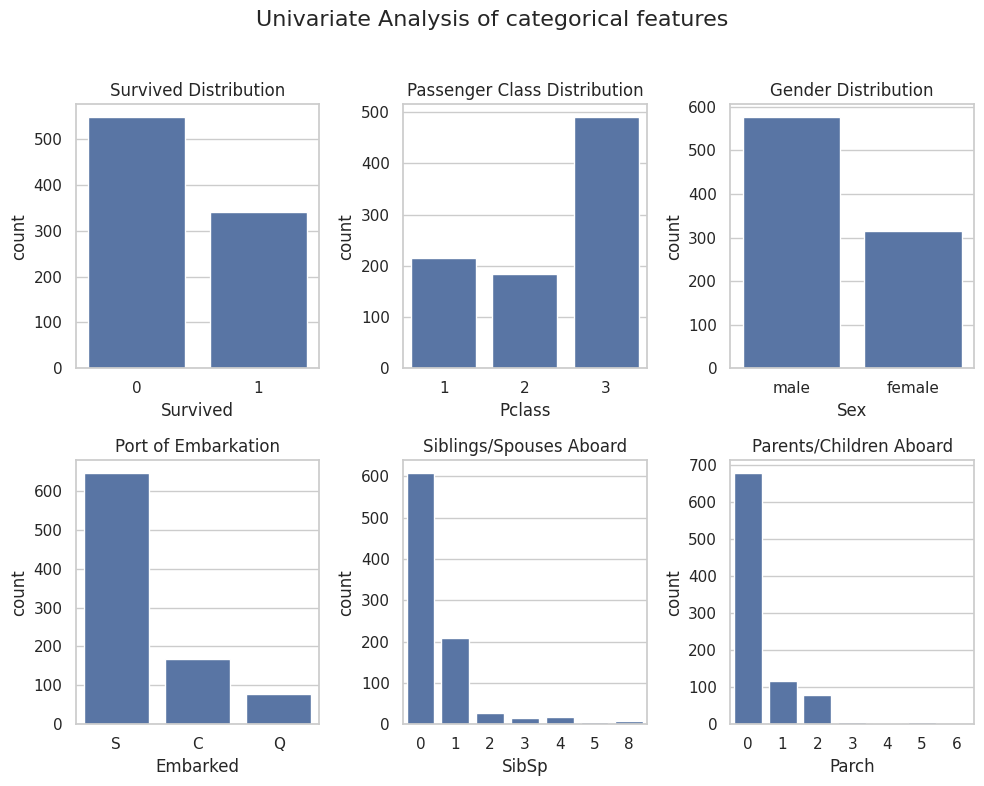

In [24]:
print('Analyzing categorical features ')

fig, axes = plt.subplots(2, 3, figsize=(10, 8))
fig.suptitle('Univariate Analysis of categorical features', fontsize=16)

sns.countplot(ax=axes[0,0], x='Survived', data=df).set_title('Survived Distribution')
sns.countplot(ax=axes[0,1], x='Pclass', data=df).set_title('Passenger Class Distribution')
sns.countplot(ax=axes[0,2], x='Sex', data=df).set_title('Gender Distribution')
sns.countplot(ax=axes[1,0], x='Embarked', data=df).set_title('Port of Embarkation')
sns.countplot(ax=axes[1,1], x='SibSp', data=df).set_title('Siblings/Spouses Aboard')
sns.countplot(ax=axes[1,2], x='Parch', data=df).set_title('Parents/Children Aboard')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Key Insights (Categorical):**
- **Survival:** Most passengers (over 500) did not survive.
- **Pclass:** The 3rd class was the most populated, followed by 1st and then 2nd.
- **Sex:** There were significantly more males than females.
- **Embarked:** The vast majority of passengers embarked from Southampton ('S').
- **SibSp & Parch:** Most passengers traveled alone.

Analyzing numerical features 


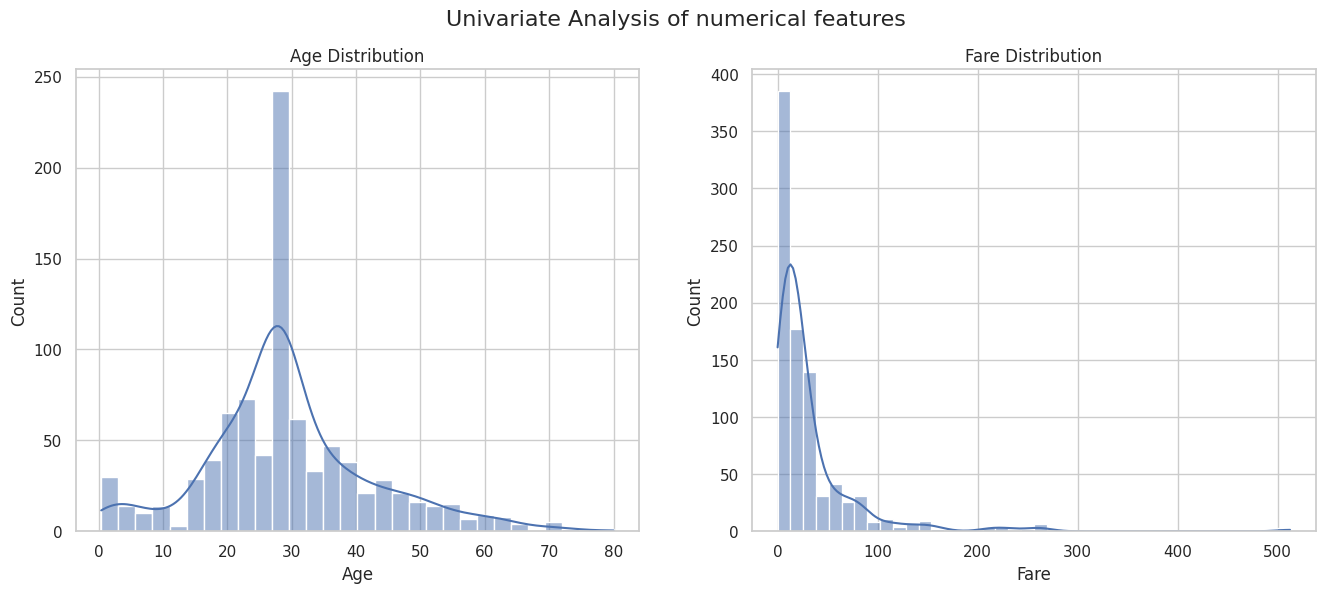

In [25]:
print('Analyzing numerical features ')

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Univariate Analysis of numerical features', fontsize=16)

sns.histplot(ax=axes[0], x='Age', data=df, kde=True, bins=30).set_title('Age Distribution')

sns.histplot(ax=axes[1], x='Fare', data=df, kde=True, bins=40).set_title('Fare Distribution')

plt.show()

**Key Insights (Numerical):**
- **Age:** The distribution peaks around the 20-30 age range. Remember we filled missing values with the median (28), which contributes to the height of that central bar.
- **Fare:** The distribution is heavily right-skewed, confirming that most tickets were cheap, with a few very expensive exceptions.

##  Step 4: Bivariate Analysis

- **Categorical vs. Numerical:** To compare a numerical variable across different categories, we often use bar plots (`barplot`) that show the mean (or another estimator) of the numerical variable for each category. We can also use box plots or violin plots.
- **Categorical vs. Categorical:** We can use stacked bar charts or contingency tables (crosstabs).
- **Numerical vs. Numerical:** A scatter plot is the standard choice, with a correlation matrix being used to quantify the relationship.


Bivariate Analysis: Feature vs Survival


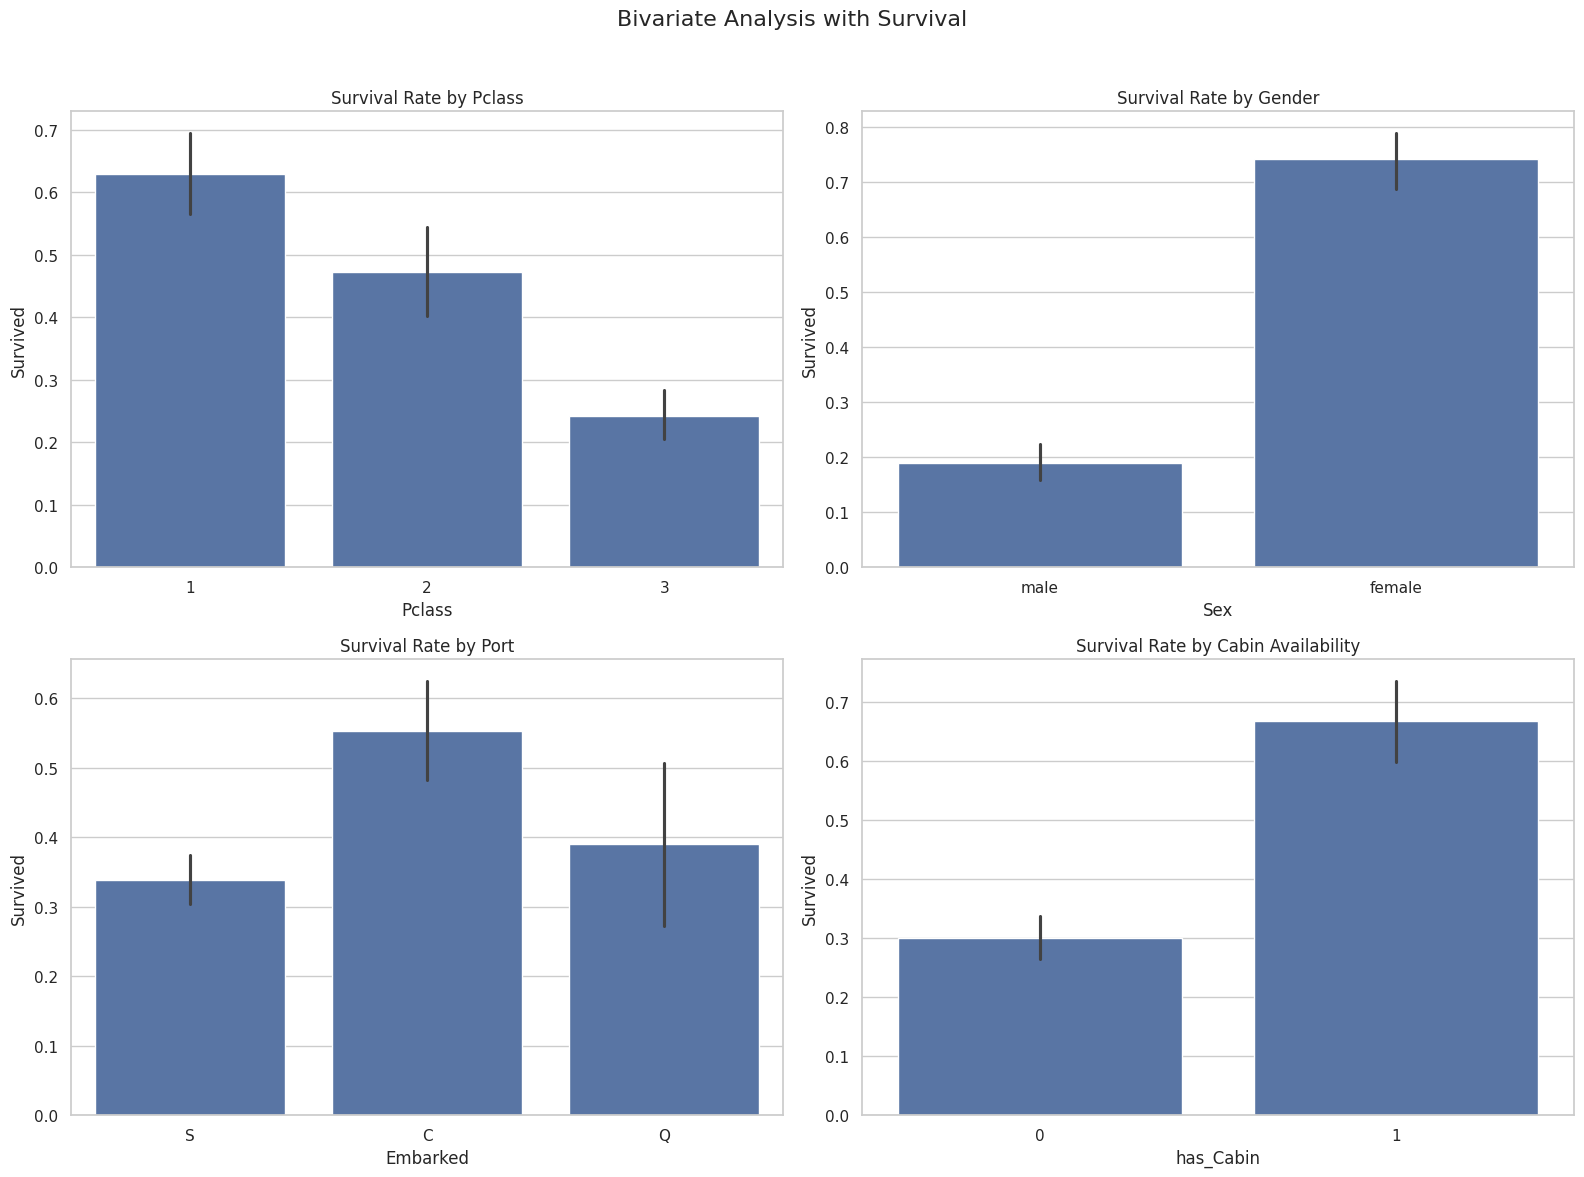

In [26]:
print('Bivariate Analysis: Feature vs Survival')

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Bivariate Analysis with Survival', fontsize=16)

sns.barplot(ax=axes[0,0], x='Pclass', y='Survived', data=df).set_title('Survival Rate by Pclass')
sns.barplot(ax=axes[0,1], x='Sex', y='Survived', data=df).set_title('Survival Rate by Gender')
sns.barplot(ax=axes[1,0], x='Embarked', y='Survived', data=df).set_title('Survival Rate by Port')
sns.barplot(ax=axes[1,1], x='has_Cabin', y='Survived', data=df).set_title('Survival Rate by Cabin Availability')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


**Key Insights (Bivariate):**
- **Pclass:** A clear trend emerges: 1st class passengers had a >60% survival rate, while 3rd class passengers had less than 25%.
- **Sex:** This is the strongest predictor. Females had a survival rate of ~75%, while males had a rate below 20%.
- **Embarked:** Passengers embarking from Cherbourg ('C') had a higher survival rate than those from the other ports.
- **Has_Cabin:** Passengers with a registered cabin number had a much higher survival rate. This is likely correlated with being in 1st class.

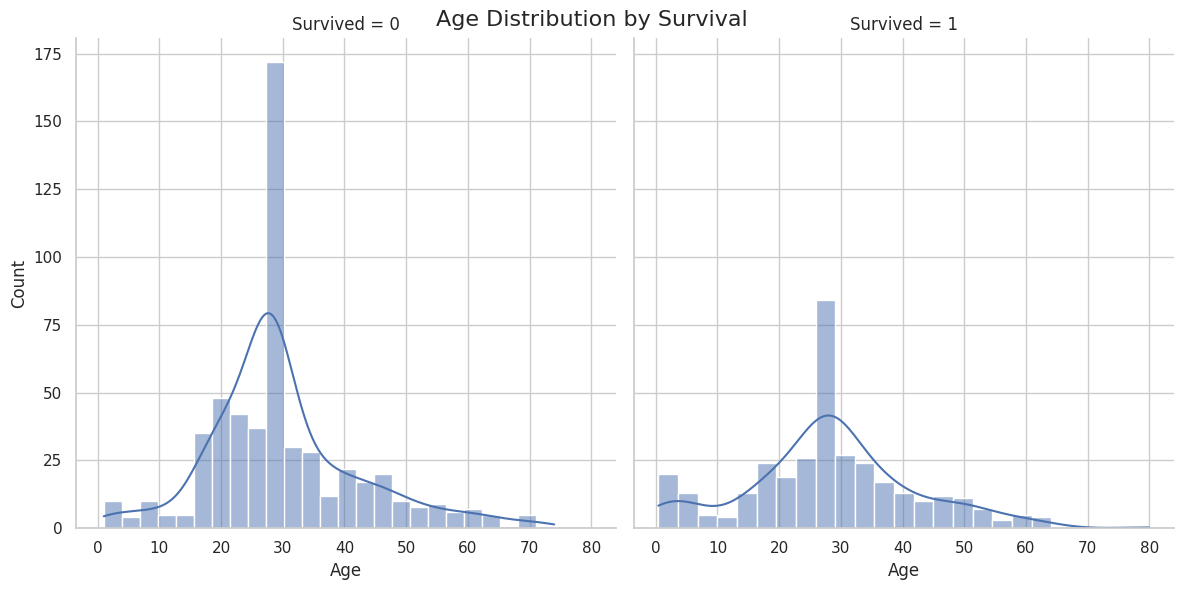

In [27]:
g = sns.FacetGrid(df, col='Survived', height=6)
g.map(sns.histplot, 'Age', bins=25, kde=True)
plt.suptitle('Age Distribution by Survival', fontsize=16)
plt.show()

**Key Insight (Age vs. Survival):**
- Infants and young children had a higher probability of survival.
- A large portion of non-survivors were young adults (20-40).
- The oldest passengers (80 years) did not survive.

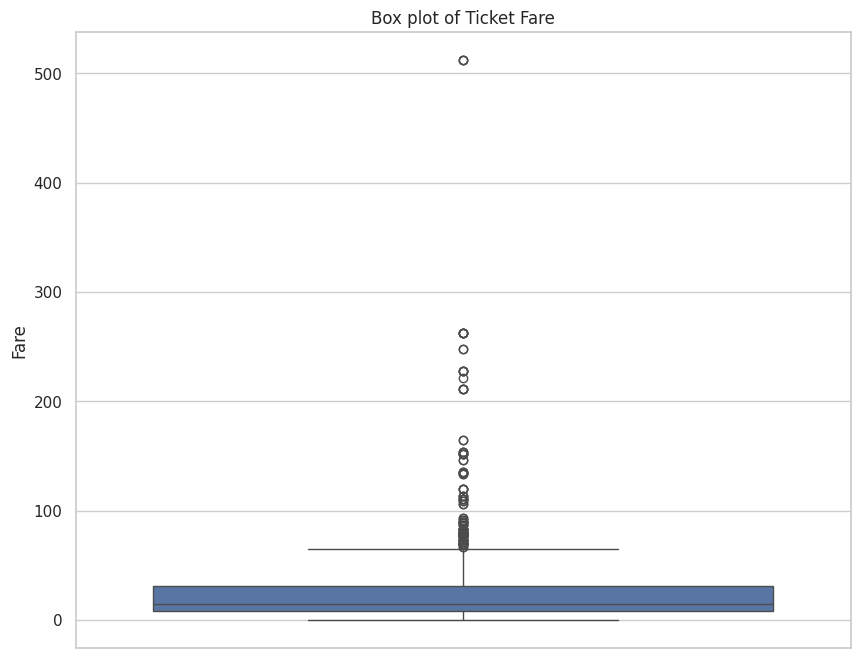

In [28]:
plt.figure(figsize=(10, 8))
sns.boxplot(y='Fare', data=df)
plt.title('Box plot of Ticket Fare')
plt.ylabel('Fare')
plt.show()

##  Step 5: Feature Engineering (Creating New Features)

### New Features Created
- **FamilySize** = `SibSp + Parch + 1`
- **IsAlone** → `1` if passenger traveled alone  
- **Title** → extracted from Name (`Mr`, `Mrs`, `Miss`, `Master`, etc.)

### Why This Mattered
- Small families (2–4 members) had higher survival  
- Solo travelers survived less  
- Titles gave strong survival signals:
  - `Mrs`, `Miss` → high survival  
  - `Mr` → very low survival  
  - `Master` (young boys) → high survival  

---

In [29]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,has_Cabin,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1


In [31]:
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,has_Cabin,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,1


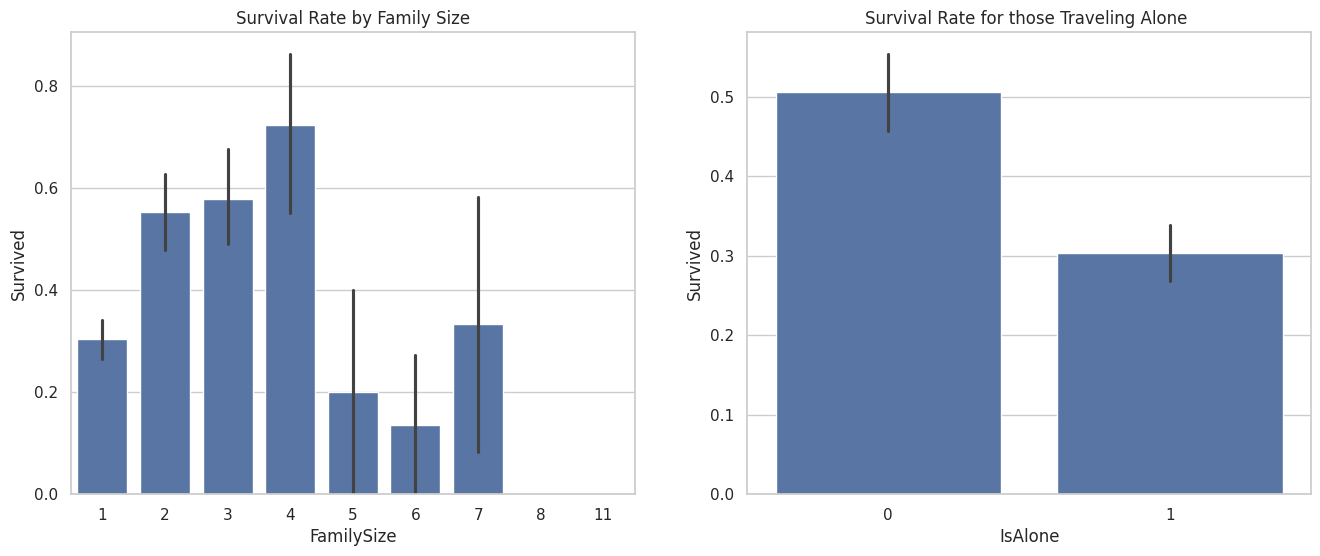

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(ax=axes[0], x='FamilySize', y='Survived', data=df).set_title('Survival Rate by Family Size')
sns.barplot(ax=axes[1], x='IsAlone', y='Survived', data=df).set_title('Survival Rate for those Traveling Alone ')

plt.show()

In [34]:
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\. ', expand=False)

print('Extracted Titles: ')
df['Title'].value_counts()

Extracted Titles: 


,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


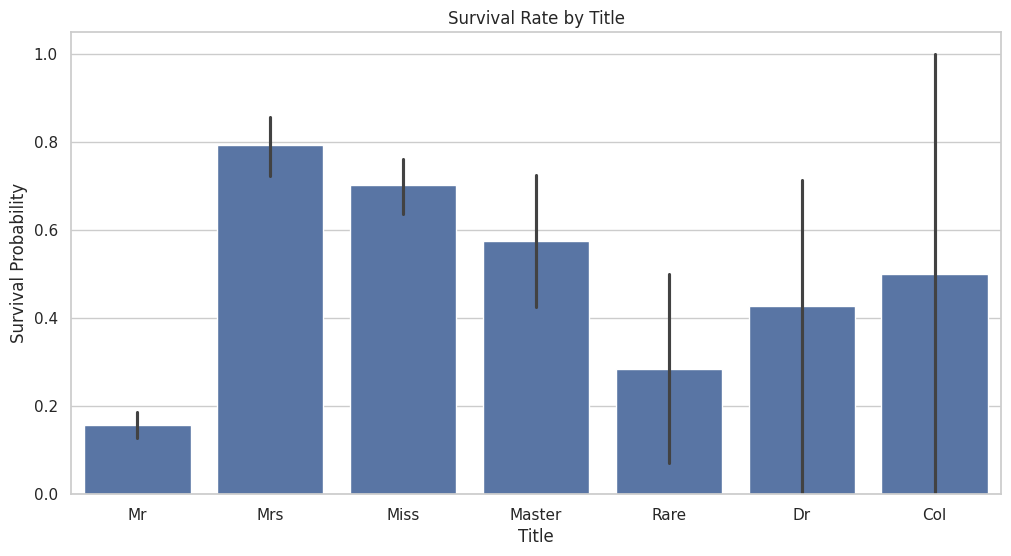

In [35]:
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Don', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

plt.figure(figsize=(12, 6))
sns.barplot(x='Title', y='Survived', data=df)
plt.title('Survival Rate by Title')
plt.ylabel('Survival Probability')
plt.show()


## Step 6: Multivariate Analysis (Multiple Features Together)

### Examples
- **Sex + Pclass vs Survival**
  - Females survived across all classes
- **Age + Sex + Survival**
  - Male survivors were mostly children
  - Females survived across all age groups

This helped understand **combined feature effects**.

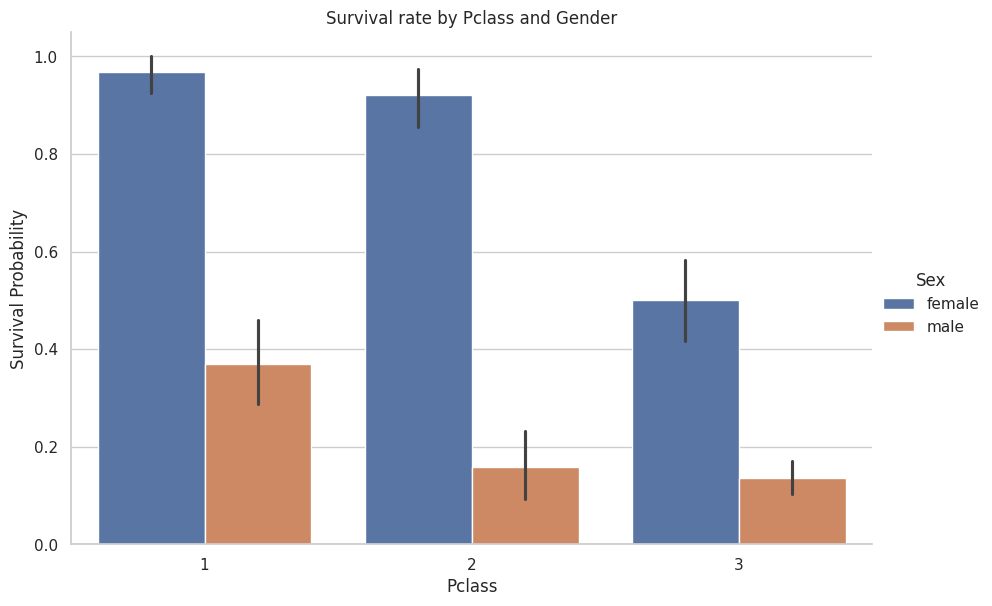

In [36]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df, kind='bar', height=6, aspect=1.5)
plt.title('Survival rate by Pclass and Gender')
plt.ylabel('Survival Probability')
plt.show()

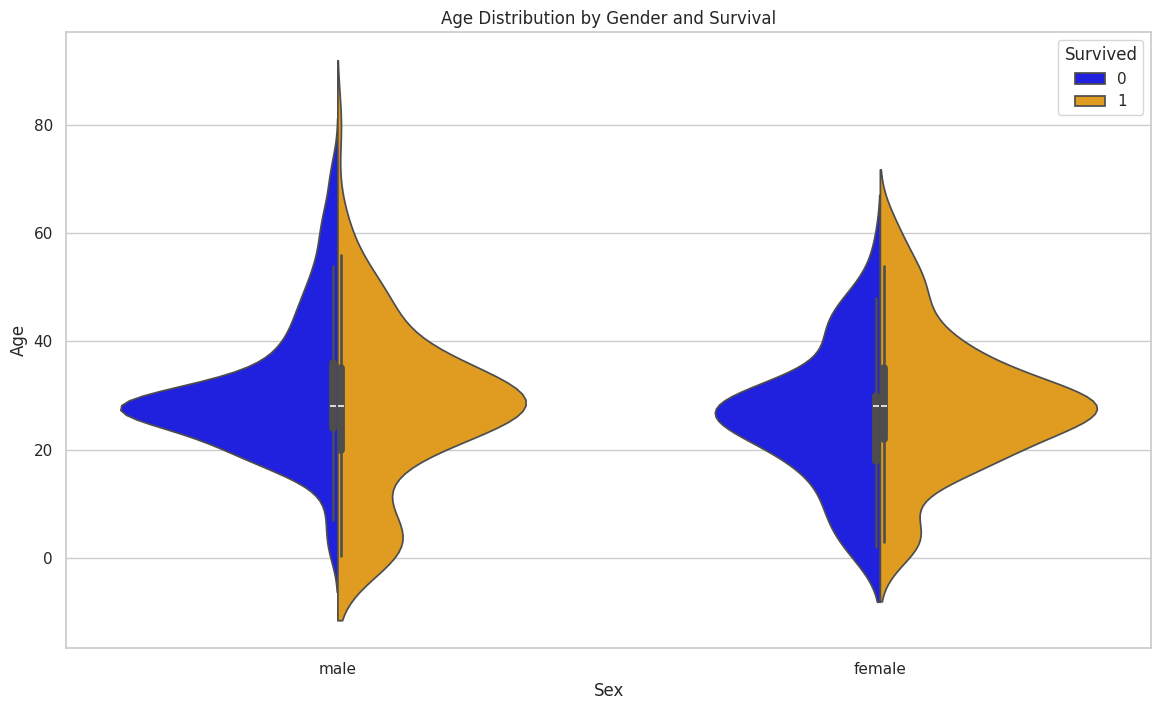

In [37]:
plt.figure(figsize=(14, 8))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True, palette={0:'blue', 1:'orange'})
plt.title('Age Distribution by Gender and Survival')
plt.show()

**Insight from Violin Plot:**
- For males, the peak of the distribution for survivors (orange) is at a very young age (children), while the peak for non-survivors is in the 20-30 range.
- For females, the distribution of survivors is much broader, indicating that females of most ages had a good chance of surviving.

##  Step 7: Correlation Analysis

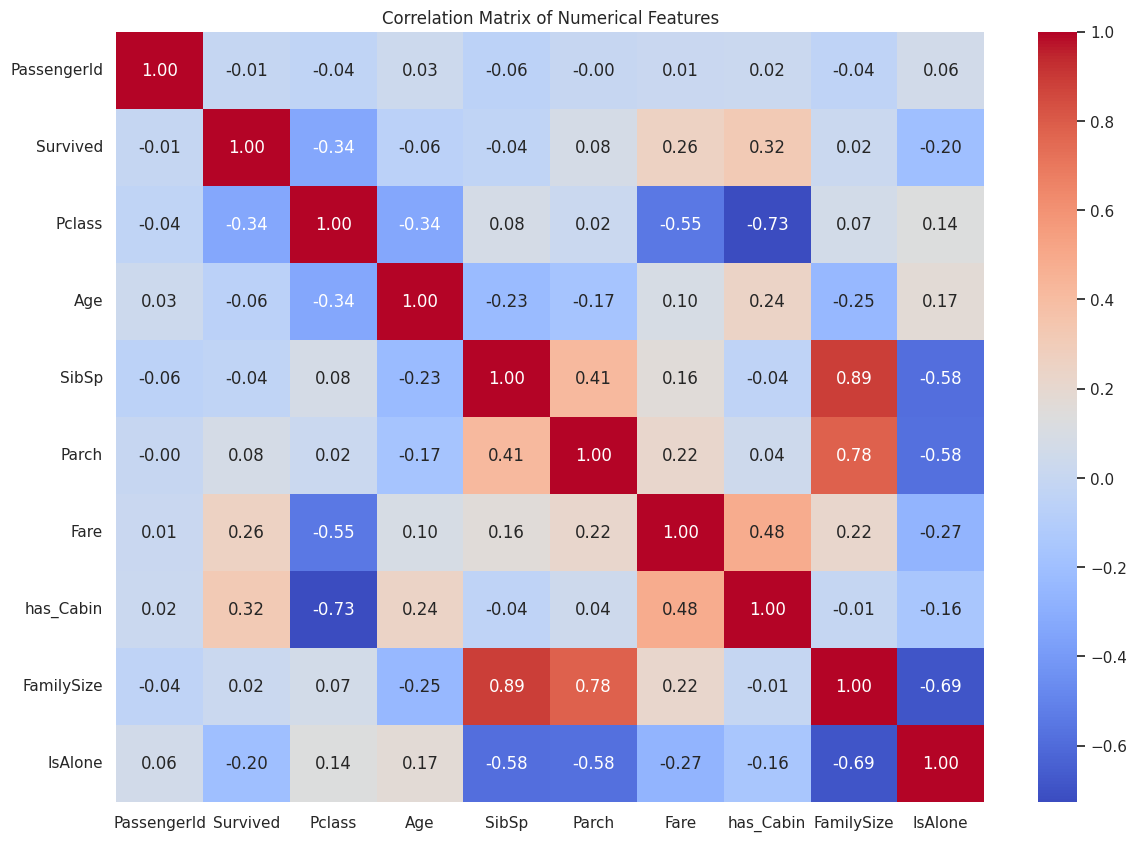

In [38]:
plt.figure(figsize=(14, 10))
numeric_cols = df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [39]:
import pandas as pd

sample_data = {'col1': [1, 2, 3, 4],
               'col2': ['A', 'B', 'C', 'D'],
               'col3': [True, False, True, False]}
sample_df = pd.DataFrame(sample_data)

print("Sample DataFrame:")
display(sample_df)

Sample DataFrame:


,col1,col2,col3
0,1,A,True
1,2,B,False
2,3,C,True
3,4,D,False


 **Survived** had:
  - Positive correlation with **Fare** & **Has_Cabin**
  - Negative correlation with **Pclass** & **IsAlone**

This confirmed that **wealth and social status played a major role**.

#Homework: y- profiling


##  Step 8: ydata-profiling

- Generated an **automatic profiling report**
- It summarizes:
  - Missing values  
  - Distributions  
  - Correlations  
  - Data quality warnings  

 The report was saved as an **HTML file** for submission.

---

In [40]:
!pip install ydata-profiling -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.7/398.7 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 78.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.0 MB/s eta 0:00:00


In [41]:
from ydata_profiling import ProfileReport

profile = ProfileReport(sample_df, title="Titanic Dataset Profiling Report")

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 3/3 [00:00<00:00, 130.18it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [42]:
profile.to_file("sample.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

##  Final Conclusion (In Simple Words)

###  Who survived the Titanic and why?
- Women and children had the highest survival rates  
- 1st class passengers survived more  
- Passengers with cabins and higher fares survived more  
- Small families survived better than solo travelers  
- Titles like `Mrs`, `Miss`, and `Master` were strong predictors  